In [1]:
import os
import numpy as np 
from astropy.table import Table, vstack
from astropy.table import join as aJoin

from tqdm import trange

In [2]:
# -- plotting -- 
import corner as DFM
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [3]:
dat_dir = '/scratch/gpfs/chhahn/haloflow/hf2/'

tng50 = Table.read(os.path.join(dat_dir, 'hf2.TNG50.morph_subhalo.csv'))
tng100 = Table.read(os.path.join(dat_dir, 'hf2.TNG100.morph_subhalo.csv'))
eagle = Table.read(os.path.join(dat_dir, 'hf2.Eagle100.morph_subhalo.csv'))
simba = Table.read(os.path.join(dat_dir, 'hf2.Simba100.morph_subhalo.csv'))

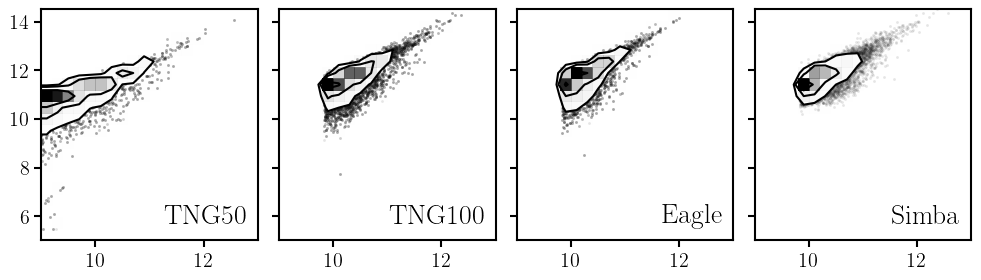

In [10]:
fig = plt.figure(figsize=(12,3))
for i, sim in enumerate([tng50, tng100, eagle, simba]): 
    sub = fig.add_subplot(1,4,i+1)

    _ = DFM.hist2d(sim['log_subhalomass_stars'], sim['log_subhalomass_dm'], range=[(9., 13.), (5., 14.5)])
    sub.text(0.95, 0.05, ['TNG50', 'TNG100', 'Eagle', 'Simba'][i], transform=sub.transAxes, ha='right', va='bottom', fontsize=20)
    if i > 0: sub.set_yticklabels([])
    
fig.subplots_adjust(wspace=0.1)